# Feature Engineering

In [4]:
import pandas as pd
pd.set_option("display.max_columns", None)

In [5]:
# Loading the dataset
df = pd.read_csv("datasets/fsd_cleaned.csv", index_col=0)

In [6]:
print(df.shape, "\n")
df.head()

(26953, 49) 



,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,ldl_url,ldl_path,urlLen,domainlength,pathLength,subDirLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,NumberofDotsinURL,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,Directory_DigitCount,Extension_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Arguments_LongestWordLength,URLQueries_variable,spcharUrl,delimeter_path,NumberRate_URL,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,Entropy_Domain,Entropy_DirectoryName,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,0,0,58,25,26,26,0.448276,0.034483,0.08,0.431034,1.04,0.076923,5,0.6,0,1,0,1,47,22,8,13,0,0,13,14,0,0,3,2,0.017241,0.066667,1.000000,0.0,8,3,2,1,0,0.784493,0.894886,0
1,0,4,5,5.5,14,6.000000,4,0,0,66,25,34,34,0.515151,0.030303,0.08,0.378788,1.36,0.058824,4,0.6,0,0,0,0,56,22,8,13,9,0,13,14,0,0,4,1,0.000000,0.000000,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0
2,0,4,5,5.5,14,5.800000,4,0,0,65,25,33,33,0.507692,0.030769,0.08,0.384615,1.32,0.060606,4,0.6,0,0,0,0,55,22,8,13,8,0,13,14,0,0,4,1,0.000000,0.000000,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0
3,0,4,12,5.5,14,5.500000,4,0,0,109,25,77,77,0.706422,0.018349,0.08,0.229358,3.08,0.025974,4,0.6,0,0,0,0,92,22,8,13,45,0,52,14,0,0,4,8,0.000000,0.000000,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0
4,0,4,6,5.5,14,7.333334,4,0,0,81,25,49,49,0.604938,0.024691,0.08,0.308642,1.96,0.040816,4,0.6,0,0,0,0,70,22,8,13,23,0,24,14,0,0,4,2,0.000000,0.000000,0.022008,0.0,8,3,3,0,0,0.784493,0.814725,0


In [7]:
df["URL_Type_obf_Type"].value_counts().index.tolist()

[1, 3, 4, 0, 2]

In [8]:
df["URL_Type_obf_Type"].value_counts()

URL_Type_obf_Type
1    7464
3    7359
4    5331
0    5068
2    1731
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [10]:
# Encoding the "URL_Type_obf_Type" column
encoder = LabelEncoder()
df["URL_Type_obf_Type"] = encoder.fit_transform(df["URL_Type_obf_Type"])

In [11]:
class_mapping = {}
for i, cls in enumerate(encoder.classes_):
    class_mapping[cls] = i

class_mapping

{np.int64(0): 0,
 np.int64(1): 1,
 np.int64(2): 2,
 np.int64(3): 3,
 np.int64(4): 4}

In [12]:
# Save the encoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(encoder, file)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Separating the data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [15]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [16]:
print("Train data shape:\nFeatures:{}\nLabel:{}".format(X_train.shape, y_train.shape))
print("\nTest data shape:\nFeatures:{}\nLabel:{}".format(X_test.shape, y_test.shape))

Train data shape:
Features:(21562, 48)
Label:(21562,)

Test data shape:
Features:(5391, 48)
Label:(5391,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [19]:
# Training the model on the training set
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Evaluating the performance of the model
preds = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, preds)
print("Model Test Set Accuracy: {:.3f}".format(accuracy))

Model Test Set Accuracy: 0.965


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
print("Classification Report:\n\n", classification_report(y_test, preds))

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1006
           1       0.97      0.99      0.98      1514
           2       0.98      0.84      0.91       340
           3       0.94      0.96      0.95      1488
           4       0.99      0.97      0.98      1043

    accuracy                           0.96      5391
   macro avg       0.97      0.95      0.96      5391
weighted avg       0.97      0.96      0.96      5391



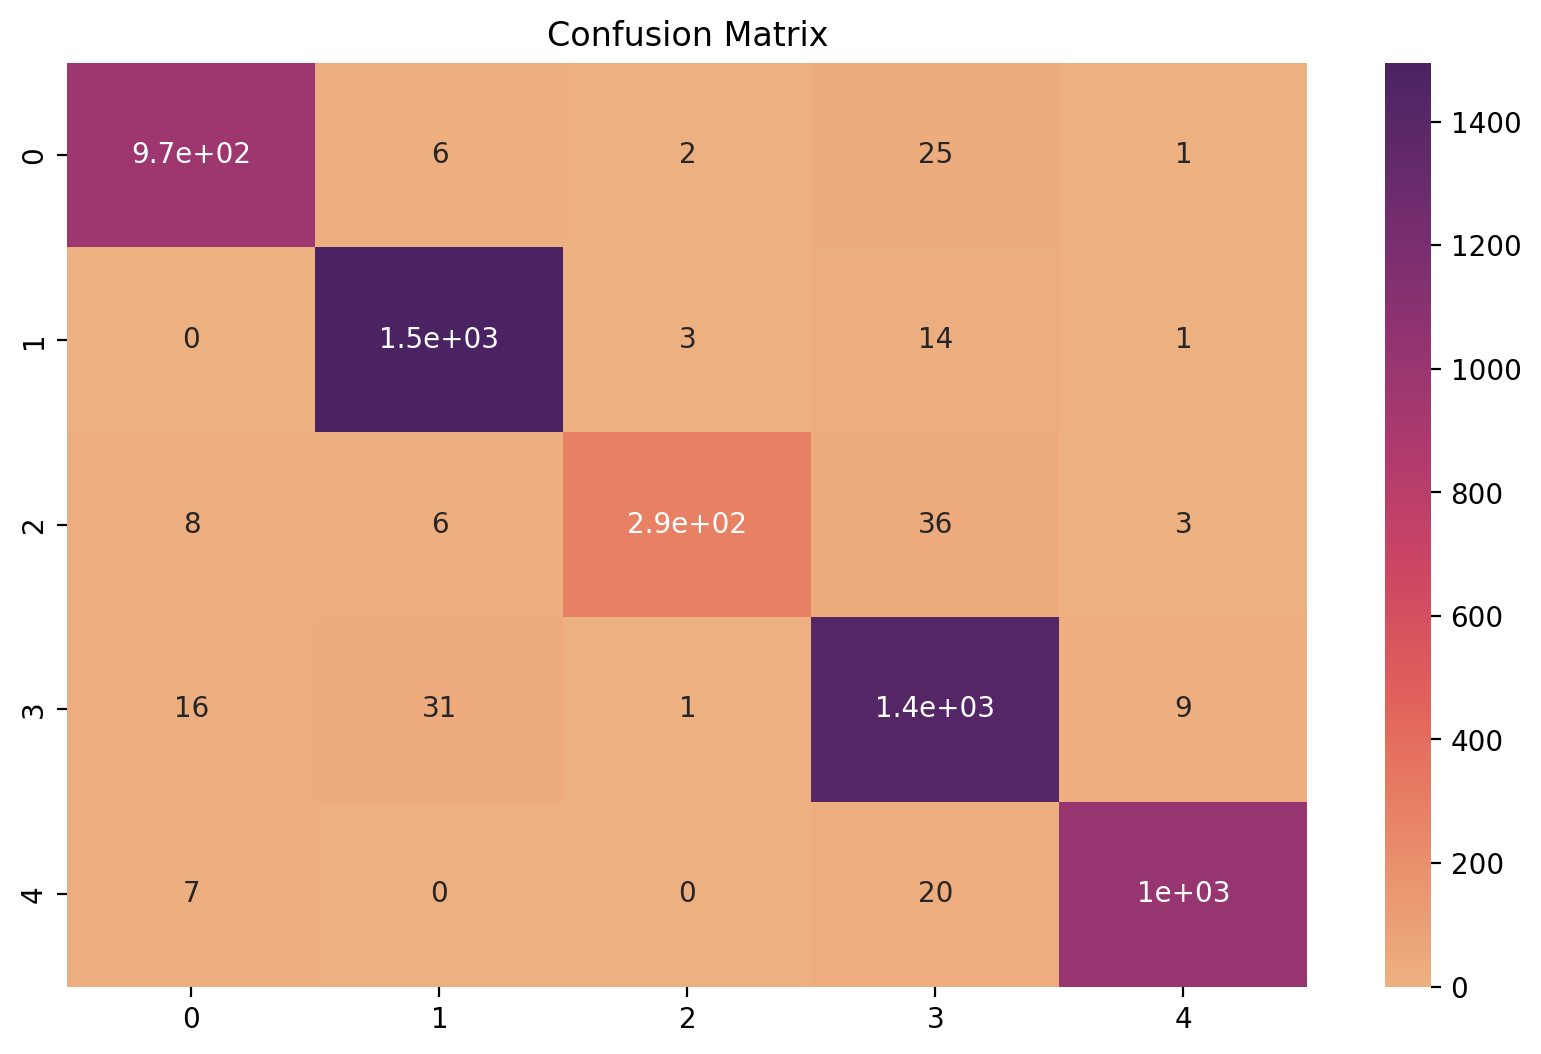

In [24]:
# Getting the confusion matrix for the model's performance
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(
    confusion_matrix(y_test, preds),
    annot=True,
    xticklabels=class_mapping.keys(),
    yticklabels=class_mapping.keys(),
    cmap="flare"
)
plt.title("Confusion Matrix")
plt.savefig("./plots/feature_engineering_confusion_matrix")
plt.show()

In [25]:
# Getting the relevant features from the model
feature_importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
top_20_features = feature_importances.sort_values(ascending=False).head(20)

top_20_features

SymbolCount_Domain         0.040481
domain_token_count         0.037295
NumberofDotsinURL          0.036741
ArgUrlRatio                0.032496
tld                        0.031668
NumberRate_Extension       0.029820
LongestPathTokenLength     0.028754
domainlength               0.028221
Entropy_Domain             0.026159
host_letter_count          0.025603
CharacterContinuityRate    0.025598
Directory_LetterCount      0.024870
argDomanRatio              0.024864
avgdomaintokenlen          0.024719
urlLen                     0.024706
avgpathtokenlen            0.023679
pathDomainRatio            0.023522
argPathRatio               0.023066
NumberRate_URL             0.021507
LongestVariableValue       0.021316
dtype: float64

In [26]:
threshold = 0.01
selected_features = feature_importances[feature_importances > threshold]

In [27]:
print("Total number of selected features: {}".format(len(selected_features)))

Total number of selected features: 47


In [28]:
# Saving the seleced features data to a json file
selected_features.to_json("selected_features.json")

In [29]:
features_list = [*selected_features.index, "URL_Type_obf_Type"]

In [30]:
# Creating a dataset with the selected features
selected_features_df = df[features_list]

In [31]:
selected_features_df

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,ldl_url,ldl_path,urlLen,domainlength,pathLength,subDirLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,NumberofDotsinURL,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,Extension_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Arguments_LongestWordLength,URLQueries_variable,spcharUrl,delimeter_path,NumberRate_URL,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,Entropy_Domain,Entropy_DirectoryName,URL_Type_obf_Type
0,0,4,5,5.500000,14,4.400000,4,0,0,58,25,26,26,0.448276,0.034483,0.080000,0.431034,1.040000,0.076923,5,0.600000,0,1,1,47,22,8,13,0,0,13,14,0,0,3,2,0.017241,0.066667,1.000000,0.000000,8,3,2,1,0,0.784493,0.894886,0
1,0,4,5,5.500000,14,6.000000,4,0,0,66,25,34,34,0.515151,0.030303,0.080000,0.378788,1.360000,0.058824,4,0.600000,0,0,0,56,22,8,13,9,0,13,14,0,0,4,1,0.000000,0.000000,0.022008,0.000000,8,3,3,0,0,0.784493,0.814725,0
2,0,4,5,5.500000,14,5.800000,4,0,0,65,25,33,33,0.507692,0.030769,0.080000,0.384615,1.320000,0.060606,4,0.600000,0,0,0,55,22,8,13,8,0,13,14,0,0,4,1,0.000000,0.000000,0.022008,0.000000,8,3,3,0,0,0.784493,0.814725,0
3,0,4,12,5.500000,14,5.500000,4,0,0,109,25,77,77,0.706422,0.018349,0.080000,0.229358,3.080000,0.025974,4,0.600000,0,0,0,92,22,8,13,45,0,52,14,0,0,4,8,0.000000,0.000000,0.022008,0.000000,8,3,3,0,0,0.784493,0.814725,0
4,0,4,6,5.500000,14,7.333334,4,0,0,81,25,49,49,0.604938,0.024691,0.080000,0.308642,1.960000,0.040816,4,0.600000,0,0,0,70,22,8,13,23,0,24,14,0,0,4,2,0.000000,0.000000,0.022008,0.000000,8,3,3,0,0,0.784493,0.814725,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36699,6,3,7,2.666667,4,4.800000,3,1,1,57,10,40,40,0.701754,0.192982,1.100000,0.175439,4.000000,0.275000,3,0.500000,6,4,4,42,8,15,6,9,2,15,4,0,1,4,1,0.070175,0.181818,0.266667,0.363636,9,2,2,3,2,0.879588,0.783307,4
36701,0,3,5,4.666666,10,3.000000,3,1,1,42,16,19,19,0.452381,0.047619,0.125000,0.380952,1.187500,0.105263,3,0.687500,0,6,0,27,14,4,2,3,0,8,10,0,0,3,2,0.142857,0.500000,0.000000,0.000000,6,2,1,1,0,0.843750,0.898227,4
36702,29,4,14,5.750000,12,3.666667,4,3,3,146,26,113,113,0.773973,0.582192,3.269231,0.178082,4.346154,0.752212,5,0.500000,23,31,27,94,23,46,7,14,24,43,12,23,3,6,2,0.212329,0.529412,0.627907,0.066667,19,3,11,3,2,0.791265,0.777498,4
36704,58,3,27,6.666666,16,3.375000,3,20,20,246,22,217,217,0.882114,0.739837,8.272727,0.089431,9.863636,0.838710,7,0.772727,58,57,51,156,20,71,3,58,48,118,16,0,1,12,9,0.231707,0.377778,0.418033,0.029412,26,2,14,8,7,0.801139,0.684777,4


In [32]:
# Saving the dataset with the selected features
selected_features_df.to_csv("datasets/feature_selected_data.csv")